# Q1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [23]:
bh_data = load_boston()
print(bh_data.keys())
boston = pd.DataFrame(bh_data.data, columns=bh_data.feature_names)
boston['MEDV'] = bh_data.target

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
print(bh_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [24]:
boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [25]:
# Selecting target y and featuresX
X = boston.iloc[:,:-1]
y = boston.iloc[:,-1]

In [26]:
# Splitting the data into a train test split
seed = 0
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=seed, shuffle=True)

In [27]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

<AxesSubplot:>

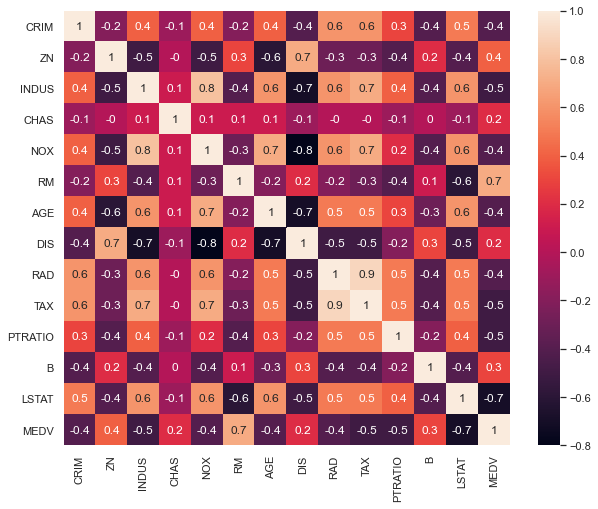

In [28]:
# Correlation Plot
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
correlation_matrix = boston.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True)

In [28]:
boston.corr()['MEDV'].abs() >= 0.7

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM          True
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT       True
MEDV        True
Name: MEDV, dtype: bool

In [29]:
slm = LinearRegression()
slm.fit(x_train[['RM']],
        y_train)

LinearRegression()

In [30]:
print(slm.intercept_)
print(slm.coef_)

-36.18099264633916
[9.31294923]


In [31]:
y_pred_train = slm.predict(x_train[['RM']])
y_pred_test = slm.predict(x_test[['RM']])

In [32]:
print('R2 score for train data: {}'.format(r2_score(y_train, y_pred_train)))
print('R2 score for test data: {}'.format(r2_score(y_test, y_pred_test)))
print('Mean squared error for train data: {}'.format(mean_squared_error(y_train, y_pred_train)))
print('Mean squared error for test data: {}'.format(mean_squared_error(y_test, y_pred_test)))

R2 score for train data: 0.48752067939343635
R2 score for test data: 0.4679000543136781
Mean squared error for train data: 43.7187065873985
Mean squared error for test data: 43.4720416772022


In [34]:
#Cross Validation Score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(slm, X[['RM']], y, cv=5, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

6.834202680262498

# Q2

In [36]:
df=pd.read_csv("User_Data - User_Data.csv")

In [37]:
x=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0)

In [39]:
print("Train data shape of X: ")
print(x_train.shape)
print("Train data shape of Y: ")
print(y_train.shape)
print("Test data shape of X: ")
print(x_test.shape)
print("Test data shape of Y: ")
print(y_test.shape)

Train data shape of X: 
(300, 2)
Train data shape of Y: 
(300,)
Test data shape of X: 
(100, 2)
Test data shape of Y: 
(100,)


In [40]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [41]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(x_train, y_train) 
y_pred = classifier.predict(x_test)

In [42]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred) 
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y_test,y_pred))

accuracy:  0.89
